In [314]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

In [315]:
df = pd.read_csv('iris.csv')
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [316]:
x = df.iloc[:, [0,1]].values

In [317]:
kmeans5 = KMeans(n_clusters=5)
y_kmeans5 = kmeans5.fit_predict(x)
print(y_kmeans5)

kmeans5.cluster_centers_

[1 2 2 2 1 1 2 1 2 2 1 2 2 2 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 2 2 1 1 1 2 2 1
 1 2 1 1 2 2 1 1 2 1 2 1 2 4 0 0 3 0 3 0 2 0 2 2 3 3 3 3 0 3 3 3 3 3 3 3 3
 0 0 0 0 3 3 3 3 3 3 3 0 0 3 3 3 3 3 3 2 3 3 3 0 2 3 0 3 4 0 0 4 2 4 0 4 0
 0 0 3 3 0 0 4 4 3 0 3 4 0 0 4 3 3 0 4 4 4 0 0 3 4 0 0 3 0 0 0 3 0 0 0 3 0
 0 3]


array([[6.53421053, 3.04210526],
       [5.22068966, 3.66551724],
       [4.77777778, 2.94444444],
       [5.83953488, 2.70930233],
       [7.43846154, 3.13076923]])

In [318]:
k_range = range(1,11)
sse = []
for k in k_range:
    km = KMeans(n_clusters = k)
    km.fit(x)
    sse.append(km.inertia_)

sse

[130.4752666666667,
 58.204092789066756,
 37.0507021276596,
 28.024426573426574,
 20.957355867306905,
 17.407916182733246,
 14.755329179122281,
 12.965335373279753,
 10.992803571428576,
 9.773604581529586]

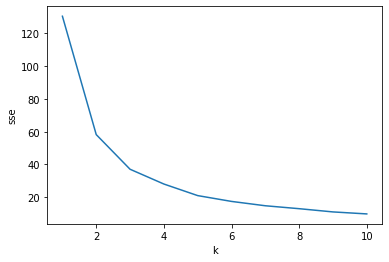

In [319]:
plt.xlabel('k')
plt.ylabel('sse')

plt.plot(k_range, sse)

In [320]:
kmeans3 = KMeans(n_clusters=3)
y_kmeans3 = kmeans3.fit_predict(x)
print(y_kmeans3)

kmeans3.cluster_centers_

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 1 1 1 1
 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 0 1
 1 0]


array([[5.77358491, 2.69245283],
       [6.81276596, 3.07446809],
       [5.006     , 3.428     ]])

In [321]:
centroids = kmeans3.cluster_centers_
labels = kmeans3.predict(x)

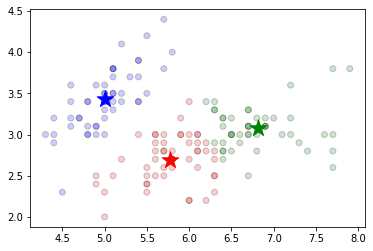

In [322]:
colmap = {1: 'r', 2: 'g', 3: 'b'}
colors = map(lambda x: colmap[x+1], labels)
colors1 = list(colors)
plt.scatter(x[:, 0], x[:, 1], color = colors1, alpha = 0.2, edgecolor = 'k')
for idx, centroid in enumerate(centroids):
    plt.scatter(*centroid, color = colmap[idx+1], marker = "*", s = 300)
